In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, ARDRegression
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_error, roc_auc_score, r2_score
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.manifold import TSNE
from xgboost import XGBRegressor

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df_train = pd.read_excel('train.xlsx')
df_test = pd.read_excel('test.xlsx')

In [3]:
df_test_drp = df_test.drop(columns=['Choline_Tot_ (mg)','Alpha_Carot_(µg)', 'Beta_Carot_(µg)',
                                      'Beta_Crypt_(µg)','Lycopene_(µg)','Lut+Zea_ (µg)','Vit_E_(mg)',
                                      'Vit_D_µg','Vit_D_IU','Vit_K_(µg)','GmWt_2','GmWt_Desc2'])
df_train_drp = df_train.drop(columns=['Choline_Tot_ (mg)','Alpha_Carot_(µg)', 'Beta_Carot_(µg)',
                                      'Beta_Crypt_(µg)','Lycopene_(µg)','Lut+Zea_ (µg)','Vit_E_(mg)',
                                      'Vit_D_µg','Vit_D_IU','Vit_K_(µg)','GmWt_2','GmWt_Desc2'])

In [4]:
df_test_fixed_0 = df_test_drp.select_dtypes(include=['number']).fillna(0)
df_train_fixed_0 = df_train_drp.select_dtypes(include=['number']).fillna(0)

In [5]:
df_train_fixed = df_train_drp.select_dtypes(include=['number']).apply(lambda x : x.fillna(x.mean()))
df_test_fixed = df_test_drp.select_dtypes(include=['number']).apply(lambda x : x.fillna(x.mean()))

In [7]:
df_train.isnull().sum()

Shrt_Desc               0
Water_(g)               5
Energ_Kcal              0
Protein_(g)             0
Lipid_Tot_(g)           0
Ash_(g)               295
Carbohydrt_(g)          0
Fiber_TD_(g)          588
Sugar_Tot_(g)        1743
Calcium_(mg)          313
Iron_(mg)             126
Magnesium_(mg)        617
Phosphorus_(mg)       522
Potassium_(mg)        366
Sodium_(mg)            75
Zinc_(mg)             633
Copper_mg)           1126
Manganese_(mg)       1928
Selenium_(µg)        1581
Vit_C_(mg)            703
Thiamin_(mg)          618
Riboflavin_(mg)       600
Niacin_(mg)           619
Panto_Acid_mg)       1931
Vit_B6_(mg)           847
Folate_Tot_(µg)      1117
Folic_Acid_(µg)      1781
Food_Folate_(µg)     1578
Folate_DFE_(µg)      1798
Choline_Tot_ (mg)    3661
Vit_B12_(µg)         1071
Vit_A_IU              611
Vit_A_RAE            1369
Retinol_(µg)         1622
Alpha_Carot_(µg)     3024
Beta_Carot_(µg)      2941
Beta_Crypt_(µg)      3032
Lycopene_(µg)        3055
Lut+Zea_ (µg

## Дополнительная задача №1 (Классификация)
Построить модель машинного обучения для предсказания
типа продукта:
1. Хлебобулочное изделие
2. Жидкость
3. Молочная продукция
4. Мясная продукция
5. Овощи/Фрукты

In [ ]:
## что то вразумительное получилось KMeans + значения без дырок

In [116]:
df_train_1 = df_train[['Protein_(g)','Lipid_Tot_(g)','Carbohydrt_(g)', 'Shrt_Desc']]
df_test_1 = df_test[['Protein_(g)','Lipid_Tot_(g)','Carbohydrt_(g)', 'Shrt_Desc']]

In [118]:
df_nan_count = df_train.isnull().sum().to_frame('count_nan').reset_index().rename(columns = {'index':'name'})

In [119]:
arr_cols = df_nan_count[df_nan_count['count_nan'] < 30].name.to_numpy()

In [120]:
df_train_1 = df_train[arr_cols]

In [121]:
df_train_1.isnull().sum()

Shrt_Desc         0
Water_(g)         5
Energ_Kcal        0
Protein_(g)       0
Lipid_Tot_(g)     0
Carbohydrt_(g)    0
dtype: int64

In [122]:
df_train_1 = df_train_1.fillna(0)

In [123]:
df_train_1_num = df_train_1.select_dtypes(include=['number'])

In [ ]:
df_train_1 = df_train_1.drop('class', axis=1)

In [124]:
model = KMeans(n_clusters=5, n_jobs=-1, max_iter=2000)
model.fit(df_train_1_num)

all_predictions = model.predict(df_train_1_num)

In [ ]:
model = AgglomerativeClustering(n_clusters=5)
model.fit(df_train_1_fixed_0)

all_predictions = model.labels_

In [125]:
df_train_1['class'] = pd.Series(all_predictions)

In [126]:
df_train_1.groupby('class').agg('count')

,Shrt_Desc,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Carbohydrt_(g)
class,,,,,,
0,2887,2887,2887,2887,2887,2887
1,754,754,754,754,754,754
2,2350,2350,2350,2350,2350,2350
3,1618,1618,1618,1618,1618,1618
4,147,147,147,147,147,147


In [35]:
df_train_1['Water_(g)'] = df_train['Water_(g)']

C:\Maxim\Python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [127]:
df_train_1[df_train_1['class'] == 4]['Shrt_Desc'].head(50)

36                        OIL,INDUSTRIAL,SOY,LO LINOLENIC
60      OIL,INDUSTRIAL,PALM KERNEL (HYDROGENATED),CONF...
130     MARGARINE,80% FAT,STK,INCL REG & HYDR CORN & S...
141                                     FISH OIL,MENHADEN
152                 BEEF,VAR MEATS & BY-PRODUCTS,SUET,RAW
153                  OIL,SUNFLOWER,LINOLEIC,(APPROX. 65%)
337                                  SALAD DRSNG,MAYO,REG
357                                         OIL,GRAPESEED
361                                PECANS,OIL RSTD,W/SALT
382                                   BUTTER,WITHOUT SALT
446                                     FAT,MUTTON TALLOW
447                      OIL,BELUGA,WHALE (ALASKA NATIVE)
517                         SHORTENING,VEG,HOUSEHOLD,COMP
695               CARIBOU,BONE MARROW,RAW (ALASKA NATIVE)
733                                  BUTTER OIL,ANHYDROUS
771                        OIL,PAM COOKING SPRAY,ORIGINAL
793                      BEEF,NZ,IMP,SUBCUTANEOUS FAT,RAW
820           

In [128]:
df_train_1[['Water_(g)', 'class']].sort_values(by='Water_(g)', ascending=False)[0:100]

,Water_(g),class
6754,100.00,0
5629,100.00,0
5185,100.00,0
5560,100.00,0
6147,100.00,0
...,...,...
3391,95.89,0
4023,95.82,0
995,95.80,0
2621,95.70,0


In [130]:
df_train_1

,Shrt_Desc,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Carbohydrt_(g),class
0,"BABYFOOD,CRL,OATMEAL,W/BANANAS,DRY",4.70,393,12.00,6.00,73.40,3
1,"HEARTS OF PALM,CANNED",90.20,28,2.52,0.62,4.62,0
2,"CHICKEN,BROILERS OR FRYERS,THIGH,MEAT ONLY,CKD...",63.89,196,24.06,11.09,0.00,2
3,"PORK,CURED,SHLDR,ARM PICNIC,LN&FAT,RSTD",54.73,280,20.43,21.35,0.00,2
4,"VINEGAR,DISTILLED",94.78,18,0.00,0.00,0.04,0
...,...,...,...,...,...,...,...
7751,"DRUM,FRESHWATER,RAW",77.33,119,17.54,4.93,0.00,0
7752,"BEEF,LOIN,TOP LOIN,LN & FAT,1/8"" FAT,SEL,RAW",63.95,224,20.59,15.04,0.00,2
7753,"POTATOES,AU GRATIN,HOME-PREPARED FROM RECIPE U...",74.00,132,5.06,7.59,11.27,0
7754,"APPLES,DEHYD (LO MOIST),SULFURED,STWD",79.36,74,0.28,0.12,19.91,0


In [132]:
X = df_train_1.drop(['Shrt_Desc', 'class'], axis=1)
y = df_train_1['class']

In [33]:
model = TSNE(n_jobs=-1, perplexity=45, learning_rate=200)
transformed = model.fit_transform(df_train_1_num)
transformed.shape

(7756, 2)

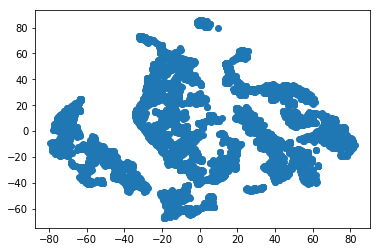

In [34]:
x_axis = transformed[:, 0]
y_axis = transformed[:, 1]

plt.scatter(x_axis, y_axis)
plt.show()

### By Shrt_Descr

In [19]:
descr = df_train.Shrt_Desc
descr[383]

'RICE,WHITE,MEDIUM-GRAIN,RAW,UNENR'

In [5]:
def my_prep(x):
    return x.split(",")[0]

In [44]:
df_frst = pd.DataFrame({'Name' : descr.apply(my_prep)})
df_frst = df_frst.groupby('Name').Name.agg('count').to_frame('Count').reset_index()
df_frst.sort_values('Count', ascending = False).head(50)

,Name,Count
65,BEEF,829
928,PORK,279
212,CEREALS RTE,233
622,LAMB,233
39,BABYFOOD,214
233,CHICKEN,181
1118,SOUP,161
414,FAST FOODS,120
183,CANDIES,115
601,KEEBLER,113


In [16]:
df_frst[df_frst.Name == 'CEREALS']

,Name,Count
211,CEREALS,88


In [21]:
df_frst[df_frst.Count == 1].shape

(760, 2)

In [27]:
df_train_1_magic = df_train.Shrt_Desc.to_frame('Shrt_Desc')

In [29]:
df_train_1_magic['class'] = [None]*df_train_1_magic.shape[0]

In [32]:
df_train_1_magic['Name'] = df_train_1_magic.Shrt_Desc.apply(my_prep)

In [59]:
class1_hleb = ['CEREALS', 'CEREALS RTE', 'BREAD']
class2_drnk = ['VINEGAR', 'SOUP', 'SAUCE', 'OIL']
class3_milk = ['YOGURT', 'ICE CREAMS', 'MILK', 'CHEESE']
class4_meat = ['BEEF', 'PORK', 'DRUM', 'KFC', 'TUNA', 'CHICKEN', 'LAMB', 'TURKEY', 'FISH', 'GAME MEAT', 'VEAL']
class5_vgtb = ['POTATOES', 'APPLES', 'DURIAN', 'CORN', 'PEPPERS', 'BEANS']
def my_class_putter(x):
    if x in class1_hleb:
        return 1
    elif x in class2_drnk:
        return 2
    elif x in class3_milk:
        return 3
    elif x in class4_meat:
        return 4
    elif x in class5_vgtb:
        return 5
    else:
        return None

In [60]:
df_train_1_magic['class'] = df_train_1_magic.Name.apply(my_class_putter)

In [65]:
df_train_1_magic[df_train_1_magic['Name'] == "FAST FOODS"]

,Shrt_Desc,class,Name
82,"FAST FOODS,FRIED CHICK,BREAST,MEAT & SKN & BRE...",NaN,FAST FOODS
117,"FAST FOODS,BAGEL,W/ EGG,SAUSAGE PATTY,CHS,& CO...",NaN,FAST FOODS
136,"FAST FOODS,BURRITO,W/BNS",NaN,FAST FOODS
190,"FAST FOODS,POTATO,BKD&TOPPED W/CHS SAU&BACON",NaN,FAST FOODS
200,"FAST FOODS,COOKIES,ANIMAL CRACKERS",NaN,FAST FOODS
...,...,...,...
7296,"FAST FOODS,SALAD,VEG,TOSSED,WO/DRSNG,W/PASTA&S...",NaN,FAST FOODS
7442,"FAST FOODS,QUESADILLA,W/ CHICK",NaN,FAST FOODS
7471,"FAST FOODS,CHEESEBURGER,DOUBLE,REG PATTY & BUN...",NaN,FAST FOODS
7556,"FAST FOODS,CHICK TENDERS",NaN,FAST FOODS


In [61]:
df_shw = df_train_1_magic[df_train_1_magic['class'].isnull()].groupby('Name').Name.agg('count').to_frame('Count').reset_index()
df_shw.sort_values('Count', ascending = False).head(50)

,Name,Count
38,BABYFOOD,214
403,FAST FOODS,120
179,CANDIES,115
587,KEEBLER,113
555,INF FORMULA,82
591,KELLOGG'S,65
288,COOKIES,60
8,ALCOHOLIC BEV,57
689,MCDONALD'S,55
1091,SNACKS,55


In [63]:
df_train_1_magic[df_train_1_magic['class'].isnull()].shape

(4869, 3)

### Look for it
* RESTAURANT
* CAMPBELL'S
* BABYFOOD
* FAST FOODS

## NLP

In [68]:
descr = df_train.Shrt_Desc
descr

0                      BABYFOOD,CRL,OATMEAL,W/BANANAS,DRY
1                                   HEARTS OF PALM,CANNED
2       CHICKEN,BROILERS OR FRYERS,THIGH,MEAT ONLY,CKD...
3                 PORK,CURED,SHLDR,ARM PICNIC,LN&FAT,RSTD
4                                       VINEGAR,DISTILLED
                              ...                        
7751                                  DRUM,FRESHWATER,RAW
7752         BEEF,LOIN,TOP LOIN,LN & FAT,1/8" FAT,SEL,RAW
7753    POTATOES,AU GRATIN,HOME-PREPARED FROM RECIPE U...
7754                APPLES,DEHYD (LO MOIST),SULFURED,STWD
7755                             TUNA,FRESH,YELLOWFIN,RAW
Name: Shrt_Desc, Length: 7756, dtype: object

In [69]:
def my_prep(x):
    return ' '.join(x.split(','))

In [71]:
descr = descr.apply(my_prep)

In [97]:
tfv = TfidfVectorizer(max_features=None, 
            strip_accents='unicode', analyzer='word',token_pattern=r'[a-zA-Z]+',
            ngram_range=(1, 1), use_idf=1,smooth_idf=1,sublinear_tf=1)

In [108]:
tfv = CountVectorizer(analyzer='word',token_pattern=r'[a-zA-Z]+', ngram_range=(1, 1), stop_words = 'english')

In [109]:
tfv.fit(descr)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='[a-zA-Z]+', tokenizer=None,
                vocabulary=None)

In [110]:
descr_tfv = tfv.transform(descr)

In [111]:
model = KMeans(n_clusters=5, n_jobs=-1, max_iter=2000)
model.fit(descr_tfv)

all_predictions = model.predict(descr_tfv)

In [112]:
df_train_1 = pd.DataFrame({'Name':descr})
df_train_1['class'] = pd.Series(all_predictions)
df_train_1.groupby('class').agg('count')

,Name
class,
0,920
1,1098
2,4680
3,876
4,182


In [113]:
tfv.get_feature_names()

['aa',
 'ab',
 'abalone',
 'abb',
 'abbo',
 'abbot',
 'abbott',
 'abbt',
 'abichuelas',
 'abiyuch',
 'ables',
 'acai',
 'acerola',
 'acid',
 'acorn',
 'acorns',
 'acting',
 'active',
 'ad',
 'add',
 'added',
 'adv',
 'adva',
 'advan',
 'advanc',
 'advance',
 'adzuki',
 'agar',
 'agave',
 'agents',
 'agutuk',
 'air',
 'al',
 'alaska',
 'alaskan',
 'alcohol',
 'alcoholic',
 'alfalfa',
 'algds',
 'alimentum',
 'alkali',
 'allgrd',
 'allpurp',
 'allspice',
 'almd',
 'almond',
 'almonds',
 'alpen',
 'alpha',
 'alphabet',
 'amaranth',
 'america',
 'american',
 'americn',
 'amos',
 'amp',
 'analyzed',
 'ancho',
 'anchovy',
 'anejo',
 'angelfood',
 'anhydrous',
 'animal',
 'animals',
 'anise',
 'anjou',
 'annatto',
 'antelope',
 'antioxidants',
 'apache',
 'appl',
 'apple',
 'applebee',
 'apples',
 'applesauce',
 'appls',
 'applsauc',
 'approx',
 'approximatly',
 'apricot',
 'apricots',
 'aquafina',
 'ar',
 'ara',
 'archway',
 'areas',
 'arepa',
 'arizona',
 'arm',
 'arrowhead',
 'arrowroot',


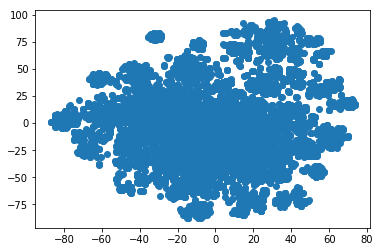

In [90]:
model = TSNE(n_jobs=-1, perplexity=50, learning_rate=600)
transformed = model.fit_transform(descr_tfv)
x_axis = transformed[:, 0]
y_axis = transformed[:, 1]

plt.scatter(x_axis, y_axis)
plt.show()

In [115]:
df_train_1[df_train_1['class'] == 4]['Name'].head(50)

151                      CHICKPEAS MAT SEEDS CND DRND SOL
192         CHERRIES SOUR RED CND LT SYRUP PK SOL&LIQUIDS
245                    FRUIT SALAD CND JUC PK SOL&LIQUIDS
256                   CORN SWT WHITE CND CRM STYLE REG PK
279                                    BEETS CND DRND SOL
358                 FRUIT COCKTAIL CND JUC PK SOL&LIQUIDS
423            BEANS PINTO MATURE SEEDS CND SOL & LIQUIDS
480            GRAPEFRUIT SECTIONS CND JUC PK SOL&LIQUIDS
522      CORN SWT WHITE CND WHL KERNEL REG PK SOL&LIQUIDS
523                    SWEET POTATO CND SYRUP PK DRND SOL
579     CHICKPEAS MATURE SEEDS CND DRND RINSED IN TAP H2O
614                              CLAM MXD SP CND DRND SOL
657                                JACKFRUIT CND SYRUP PK
807                           BOYSENBERRIES CND HVY SYRUP
838                    BEANS SNAP YEL CND REG PK DRND SOL
894                   TUNA LT CND IN H2O WO/SALT DRND SOL
932                  PEAS&CARROTS CND NO SALT SOL&LIQUIDS
990           